# Overview of the .json motion data output

## Description of the motion data output

 

### Data Structure

The mocap data is organized as a list of frames, where each frame corresponds to a specific timestamp. Each frame contains joint data for various body parts. Below is the explanation of each field and its meaning.

#### Timestamps

Each frame starts with a timestamp field, indicating the time at which the data was captured. The timestamp is represented in seconds.

#### Joint Data

The `joint_data` field contains a dictionary of joints, where each key is the name of a joint, and the value is an object containing the following properties:

- **Position**: A list of three values representing the x, y, and z coordinates of the joint in the world space (values are in meters).
- **Type**: The type of rotation used (e.g., `euler_xyz`, `euler_x`, `euler_zyx`).
- **Rotations**: A list of rotation values, which varies in length depending on the type of rotation (values are in radians). These rotations are expressed their local coordinate frame.
- **Torques**: A list of torque values applied to the joint (values are newton-meter).
- **Reaction Forces**: The reaction force experienced by the foot joints (values are in newton). If the value is 0.0, this means that the foot joint is not in contact with any surface.

#### Example of Joint Data

```json
"Root": {
    "position": [-0.1304, -0.0399, 0.9518],
    "type": "euler_xyz",
    "rotations": [0.3791, -0.2012, 2.8031],
    "torques": [-337.3071, 241.416, 200.5884],
    "reaction_forces": 0.0
}
```

Each joint entry follows a similar structure, providing a comprehensive dataset for motion capture analysis.

## Prerequisites

In [1]:
%pip install matplotlib
%pip install pandas

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.6 MB/s eta 0:00:002.1 MB/s eta 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.3 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached pyparsing-3.1.2-py3-n

## Imports

In [2]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


## Import the .json

In [3]:
data_path = Path("data/raw/mocap_data_sample.json")

with data_path.open() as f:
    data = json.load(f)

mocap_data = data["mocap_data"]

print(f"Number of frames: {len(mocap_data)}")
print(f"First frame data: {mocap_data[0].keys()}")

Number of frames: 289
First frame data: dict_keys(['timestamp', 'joint_data'])


## Convert the data into the Pandas DataFrame

In [4]:
# Convert mocap_data to a pandas DataFrame
frames = []
for frame in mocap_data:
    timestamp = frame['timestamp']
    joint_data = frame['joint_data']
    for joint, details in joint_data.items():
        details_flat = {
            'timestamp': timestamp,
            'joint': joint,
            **{f'position_{i}': p for i, p in enumerate(details['position'])},
            'type': details['type'],
            **{f'rotation_{i}': r for i, r in enumerate(details['rotations'])},
            **{f'torque_{i}': t for i, t in enumerate(details['torques'])},
            'reaction_forces': details['reaction_forces']
        }
        frames.append(details_flat)

df = pd.DataFrame(frames)

## Visualize Joint Positions

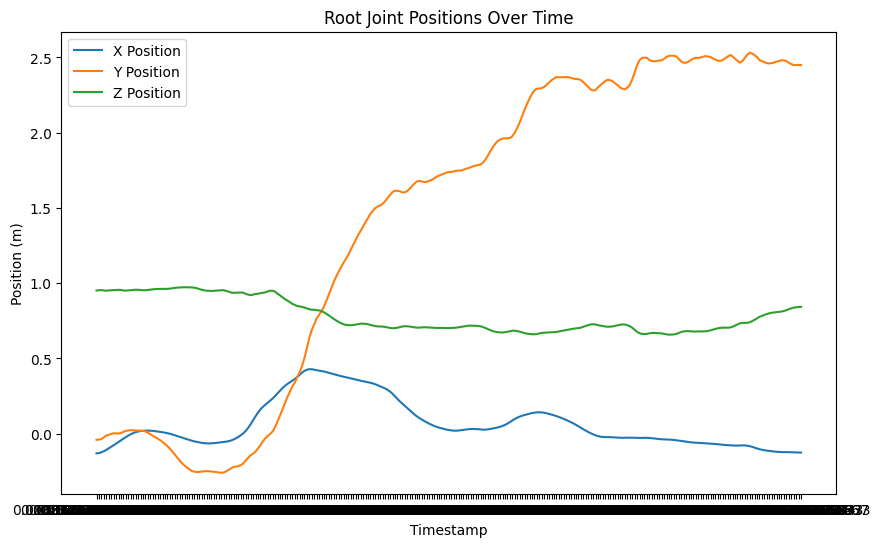

In [5]:
# Filter data for a specific joint, e.g., "Root"
root_data = df[df['joint'] == 'Root']

plt.figure(figsize=(10, 6))
plt.plot(root_data['timestamp'], root_data['position_0'], label='X Position')
plt.plot(root_data['timestamp'], root_data['position_1'], label='Y Position')
plt.plot(root_data['timestamp'], root_data['position_2'], label='Z Position')
plt.xlabel('Timestamp')
plt.ylabel('Position (m)')
plt.title('Root Joint Positions Over Time')
plt.legend()
plt.show()

## Analyze Rotations

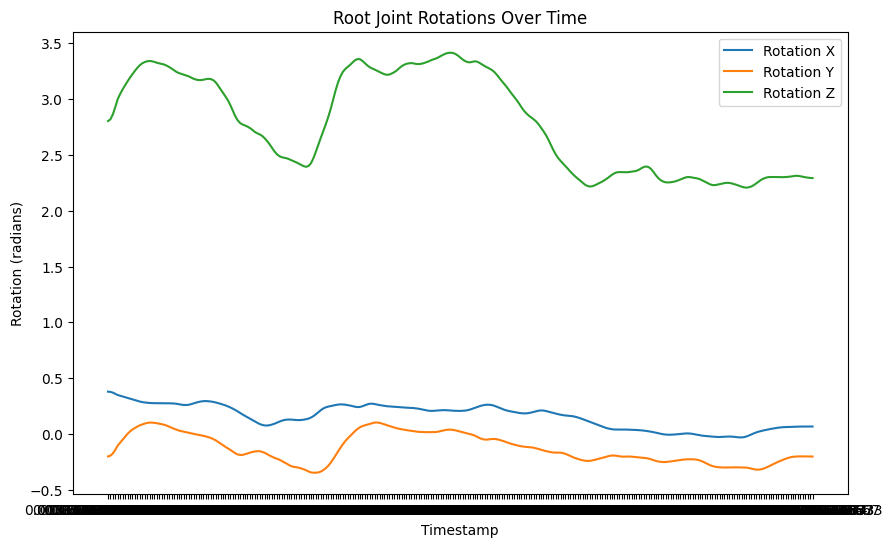

In [6]:
# Plot rotations for the "Root" joint
plt.figure(figsize=(10, 6))
plt.plot(root_data['timestamp'], root_data['rotation_0'], label='Rotation X')
plt.plot(root_data['timestamp'], root_data['rotation_1'], label='Rotation Y')
plt.plot(root_data['timestamp'], root_data['rotation_2'], label='Rotation Z')
plt.xlabel('Timestamp')
plt.ylabel('Rotation (radians)')
plt.title('Root Joint Rotations Over Time')
plt.legend()
plt.show()


## Torque and Reaction Forces

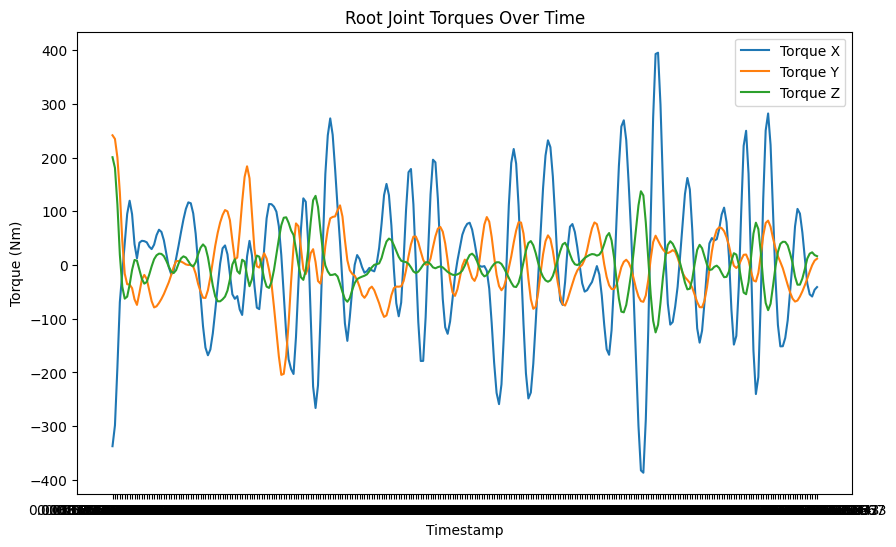

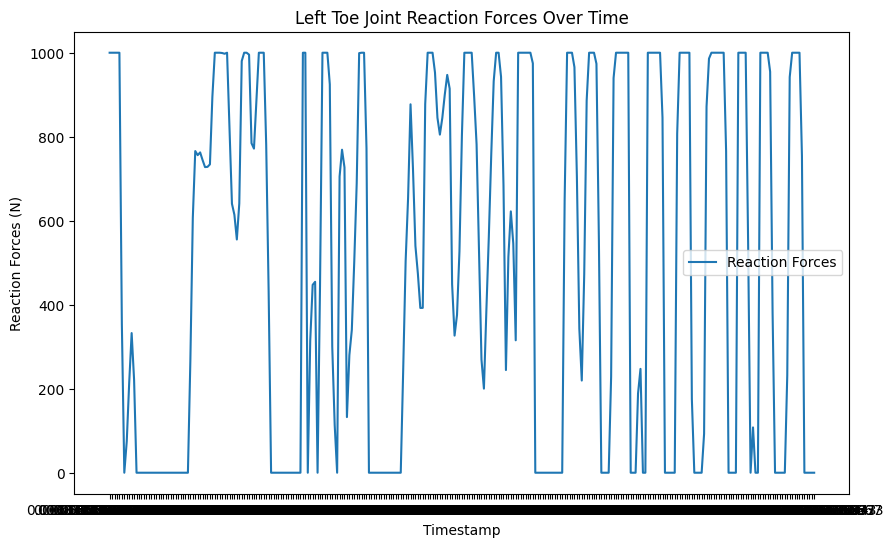

In [7]:
# Plot torques for the "Root" joint
plt.figure(figsize=(10, 6))
plt.plot(root_data['timestamp'], root_data['torque_0'], label='Torque X')
plt.plot(root_data['timestamp'], root_data['torque_1'], label='Torque Y')
plt.plot(root_data['timestamp'], root_data['torque_2'], label='Torque Z')
plt.xlabel('Timestamp')
plt.ylabel('Torque (Nm)')
plt.title('Root Joint Torques Over Time')
plt.legend()
plt.show()

# Plot reaction forces for the "Left_toe" joint
left_toe_data = df[df['joint'] == 'Left_toe']

plt.figure(figsize=(10, 6))
plt.plot(left_toe_data['timestamp'], left_toe_data['reaction_forces'], label='Reaction Forces')
plt.xlabel('Timestamp')
plt.ylabel('Reaction Forces (N)')
plt.title('Left Toe Joint Reaction Forces Over Time')
plt.legend()
plt.show()